<a href="https://colab.research.google.com/github/Karsuman4298/Deep-learning/blob/main/PYtorch(part_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt



## Data preparing and loading

**Linear regression fromula (y=mx+c) to make a straight line with known parameters**

In [2]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=(weight*X+bias)
y,y.shape


(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 torch.Size([50, 1]))

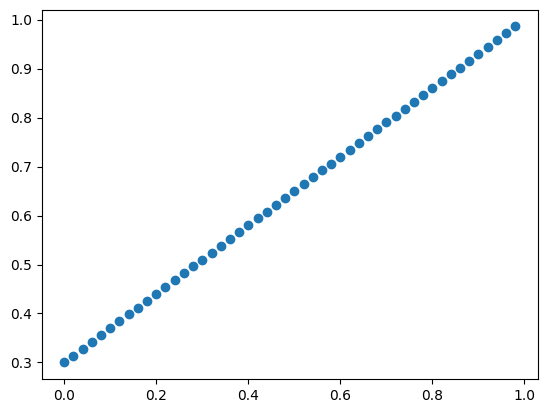

In [3]:
plt.scatter(X,y)

In [4]:
## create train/test spliy

train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

y_train.size(),y_test.size(),X_train.size(),X_test.size()



(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b",s=8,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=8,label="Testing data")


  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",label="Predictions")



  plt.legend(prop={"size":14})




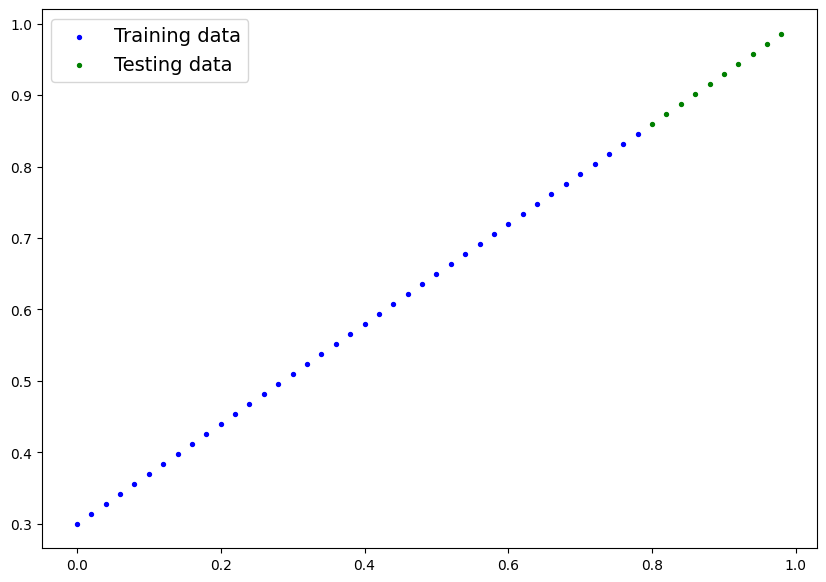

In [6]:
plot_predictions()

#  Our model starts from the random values(bias and weights) and update and adjust those random values to best fit our training data through the combination of Gradient descent and backpropagation

In [29]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))  # Use torch.float32 for better compatibility

    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))   # Use torch.float32 for better compatibility




  def forward(self, x: torch.Tensor) -> torch.Tensor:  # Renamed 'forword' to 'forward'
    return self.weights * x + self.bias

## Pytorch model building essentials

* torch.nn -> contains all thr buildings for computational graphs (NN)
* torch.nn.Parameters -> what parameters should our model try and learn
* torch.nn.Module- > the base class for all neurat network modules if you subclass it you should overwrite forword()
* torch.optim-> optimizers like SGD, Adam, RMSprop

In [30]:
#create a random seed

torch.manual_seed=(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.5632], requires_grad=True),
 Parameter containing:
 tensor([-1.3099], requires_grad=True)]

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5632])), ('bias', tensor([-1.3099]))])

In [32]:
weight,bias

(0.7, 0.3)

In [33]:
with torch.inference_mode():
  y_preds=model_0(X_test)

  y_preds

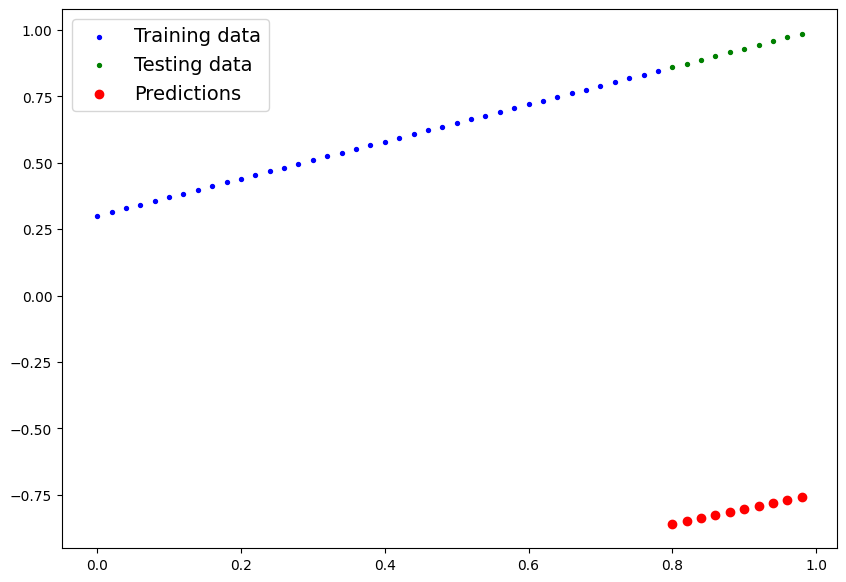

In [34]:
plot_predictions(predictions=y_preds)

##Train model
*   **Loss function:** a function which tells the model hoe wrong it's predictions is.

*  **Optimizer:** takes account the loss of the model and helps adjusting the parameters(weight and biases)

* we need training and testing loops

In [38]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.5632], requires_grad=True),
 Parameter containing:
 tensor([-1.3099], requires_grad=True)]

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5632])), ('bias', tensor([-1.3099]))])